In [4]:
sys.path

NameError: name 'sys' is not defined

In [62]:
import pickle

import sys
import pandas as pd
import sys
sys.path.append("../code/")
sys.path.append("../code/ddsc_files/")
from tensor_custom_core import *

from ddsc import train_ddsc,run_ddsc


freq, r ='1H',1
r = int(r)

tensor = pickle.load(open('{}-input.pkl'.format(freq),'r'))

t = tensor[:, :, :, :][:10]
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
pred = np.zeros_like(t)
pred[:] = np.nan

for train, test in kf.split(t)[:1]:
    print "*"*20, train, test
    sys.stdout.flush()
    t_copy = t.copy()

    d = []
    for i in range(1, 7):
        temp = pd.DataFrame(tensor[train, i, :, :].reshape(len(train), 365 * 24).T).fillna(method='pad').astype('float32')
        temp = temp.T.fillna(method='pad').T
        d.append(temp.values)
    big_a_star, big_b_tilde, all_b = train_ddsc(d, r)

    for test_home in test:
        agg = pd.DataFrame(tensor[test_home, 0, :, :].reshape(1, 365 * 24).T).fillna(method='pad').astype('float32').values
        print len(pd.DataFrame(agg).dropna()), test_home
        if len(pd.DataFrame(agg).dropna()):
            pr = run_ddsc(agg, big_b_tilde, big_a_star, all_b)
            for j in range(1, 7):
                t_copy[test_home, j, :, :] = pd.DataFrame(pr[j-1])[1].reshape(365, 24)
        else:
            print("Here i am..")
            t_copy[test_home, 1:, :, :] = np.nan
        pred[test_home] = t_copy[test_home]

#pickle.dump(pred, open("../{}-{}-pred-hourly.pkl".format(freq, r),'w'))



TypeError: 'generator' object has no attribute '__getitem__'

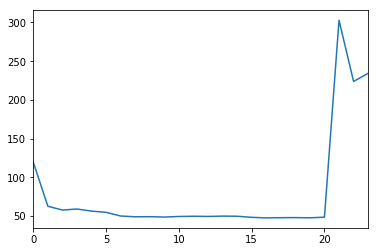

In [61]:
pd.DataFrame(pred[3, 6, :, :]).T[1].plot()



In [36]:
pred[1, 1]

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [13]:
%matplotlib inline

In [15]:
pd.DataFrame(big_a_star)

,0,1,2,3,4
0,48580.379542,83797.148360,83797.148360,79667.299062,86054.143965
1,4367.616462,6361.183251,6361.183251,5445.317276,5445.317276
2,5747.636983,1766.509625,1766.509625,172.691373,172.691373
3,1749.587418,10015.308882,10015.308882,162.864867,162.864867
4,152.690099,3277.137316,3277.137316,578.669137,578.669137
5,NaN,338.921779,570.512658,373.375297,256.002020
